<a href="https://colab.research.google.com/github/dGabo-jr/CURSOS-DE-PYTHON/blob/main/K_nearest_neighbors_(vecinos_cercanos)KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

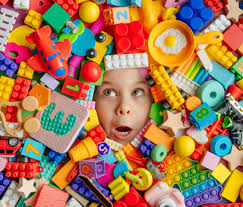

# **VECINOS CERCANOS   KNN**



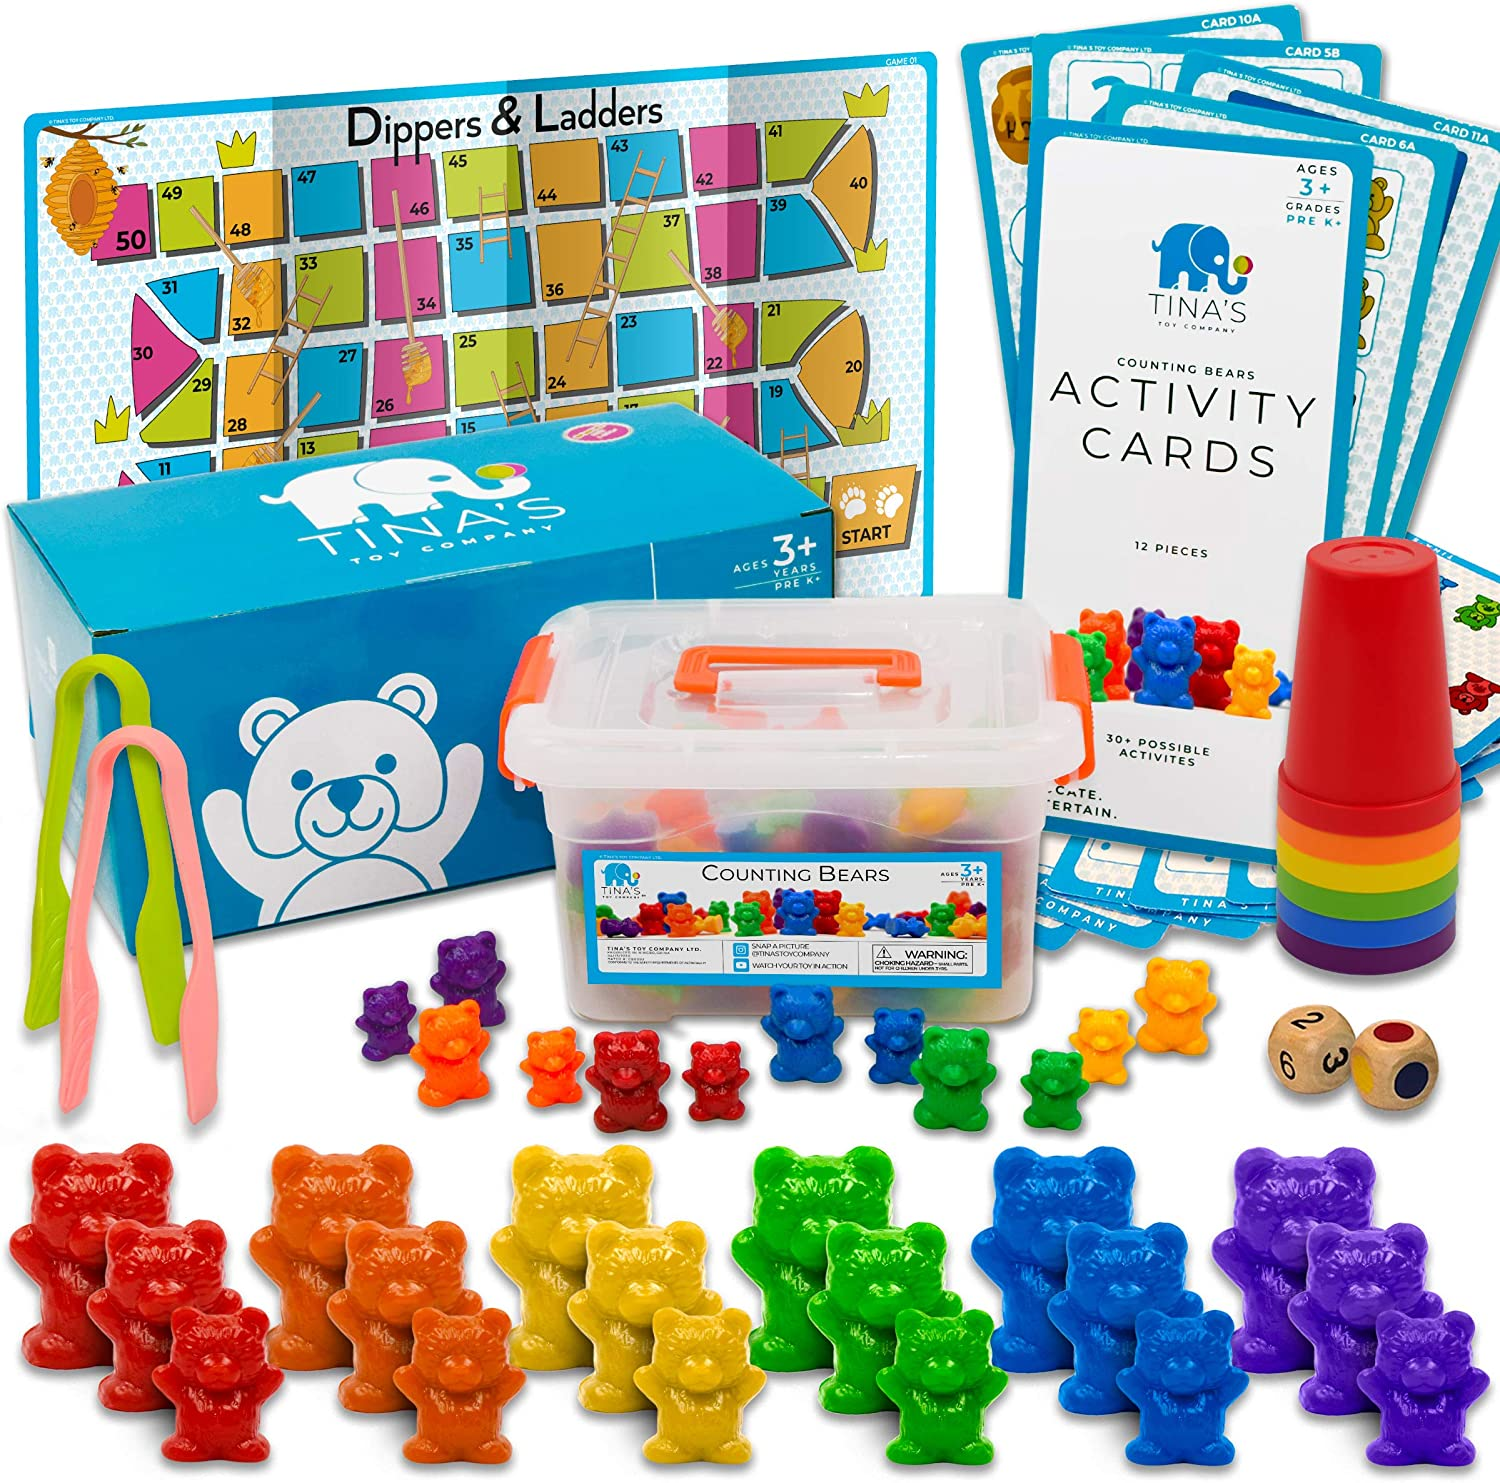

**METODOLOGÍA:**


Primero, tienes que decidir cuántos amigos quieres que te ayuden (eso es el valor de "k"). Puede ser 1, 2, 3 o más amigos, dependiendo de cuántos quieres que te ayuden a clasificar los juguetes cada uno de ellos deberá elegir solo un color.

Ahora, mira el juguete que quieres clasificar y fíjate en su color.

Luego, pregúntale a tus amigos qué color tienen sus juguetes.

Tus amigos te mostrarán los juguetes que tienen y tú tendrás que comparar el color del juguete que quieres clasificar con los colores de los juguetes de tus amigos.

Observa cuántos juguetes de tus amigos tienen el mismo color que el juguete que quieres clasificar.

Finalmente, coloca el juguete en la caja que tenga los juguetes del mismo color. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Titanic_Datos_limpios.csv to Titanic_Datos_limpios.csv


In [ ]:
df=pd.read_csv("Titanic_Datos_limpios.csv")  #leer el archivo
df# visualizamos el dataframe cargado

,Unnamed: 0,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,0,3,0,1,0,0,0
1,1,1,1,1,1,0,3,1
2,2,1,3,1,0,0,0,0
3,3,1,1,1,1,0,3,0
4,4,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...
886,886,0,2,0,0,0,1,0
887,887,1,1,1,0,0,2,0
888,888,0,3,1,1,2,2,0
889,889,1,1,0,0,0,2,1


In [ ]:
df.describe()

,Unnamed: 0,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,0.352413,0.523008,0.381594,1.377104,0.361392
std,257.353842,0.486592,0.836071,0.477990,1.102743,0.806057,1.347196,0.635673
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,445.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,667.500000,1.000000,3.000000,1.000000,1.000000,0.000000,3.000000,1.000000
max,890.000000,1.000000,3.000000,1.000000,8.000000,6.000000,5.000000,2.000000


In [ ]:
#Dividiendo los datos en X y Y  ( 2 DATA FRAME)
X_data= df.drop (["Unnamed: 0", "Survived"], axis=1)
X_data.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,0,0
1,1,1,1,0,3,1
2,3,1,0,0,0,0
3,1,1,1,0,3,0
4,3,0,0,0,0,0


In [ ]:
y_survived =df["Survived"]
y_survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
# dividndo datos en train y test
#generando datos de test  (20%) y de entrenamiento del model
X_train, X_test, y_train, y_test = train_test_split(X_data, y_survived, test_size = 0.3, random_state=42)

In [ ]:
# creando el modelo de k vecinos
knnmodelk1=KNeighborsClassifier(n_neighbors=1)
knnmodelk1.fit (X_train, y_train)   #el modelo ya está entrenado con k=1



KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_predict_k1 = knnmodelk1.predict(X_test)

In [ ]:
#analizando la matriz de confusión
cmk1= confusion_matrix(y_test,y_predict_k1)
print(cmk1)

[[135  22]
 [ 46  65]]


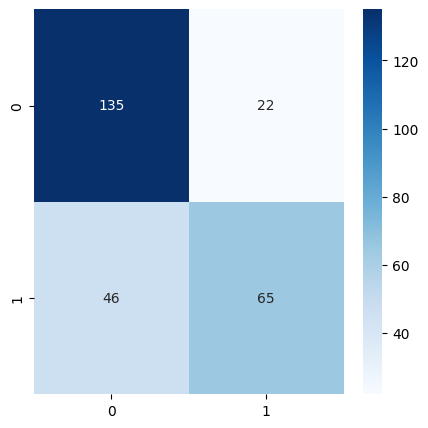

In [ ]:
#mostrando la matrzi de confusion en diagrama
plt.figure(figsize=(5,5))
sns.heatmap (cmk1, annot =True, fmt= "g", cmap = "Blues")
plt.show ()

In [ ]:
print(classification_report(y_test,y_predict_k1))   # Analizando  las variables (precision    recall  f1-score   support y accuracy(veracidadad del modelo debe estar mas cercano 1 ))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       157
           1       0.75      0.59      0.66       111

    accuracy                           0.75       268
   macro avg       0.75      0.72      0.73       268
weighted avg       0.75      0.75      0.74       268



In [ ]:
# haciendo el mismo ejercicio pero ahora con k=3
# creando el modelo de k vecinos
knnmodelk3=KNeighborsClassifier(n_neighbors=3)
knnmodelk3.fit (X_train, y_train)   #el modelo ya está entrenado con k=3
y_predict_k3 = knnmodelk3.predict(X_test)

In [ ]:
#analizando la matriz de confusión
cmk3= confusion_matrix(y_test,y_predict_k3)
print(cmk3)

[[137  20]
 [ 47  64]]


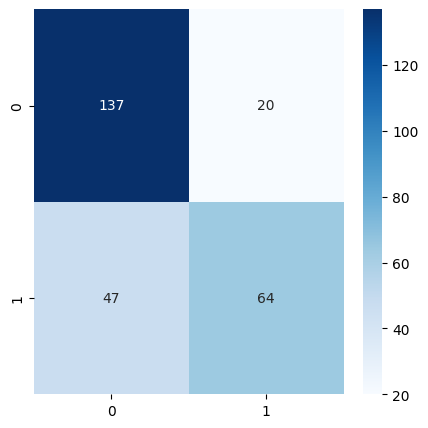

In [ ]:
#mostrando la matrzi de confusion en diagrama
plt.figure(figsize=(5,5))
sns.heatmap (cmk3, annot =True, fmt= "g", cmap = "Blues")
plt.show ()

In [ ]:
print(classification_report(y_test,y_predict_k3))   # Analizando  las variables (precision    recall  f1-score   support y accuracy(veracidadad del modelo debe estar mas cercano 1 ))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       157
           1       0.76      0.58      0.66       111

    accuracy                           0.75       268
   macro avg       0.75      0.72      0.73       268
weighted avg       0.75      0.75      0.74       268



In [ ]:
# haciendo el mismo ejercicio pero ahora con k=5
# creando el modelo de k vecinos
knnmodelk5=KNeighborsClassifier(n_neighbors=5)
knnmodelk5.fit (X_train, y_train)   #el modelo ya está entrenado con k=5
y_predict_k5 = knnmodelk5.predict(X_test)

In [ ]:
#analizando la matriz de confusión
cmk5= confusion_matrix(y_test,y_predict_k5)
print(cmk5)

[[137  20]
 [ 35  76]]


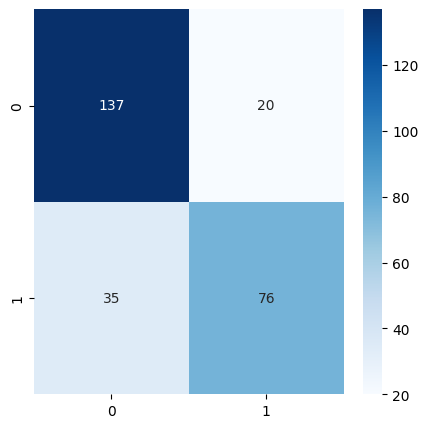

In [ ]:
#mostrando la matrzi de confusion en diagrama
plt.figure(figsize=(5,5))
sns.heatmap (cmk5, annot =True, fmt= "g", cmap = "Blues")
plt.show ()

In [ ]:
print(classification_report(y_test,y_predict_k5))   # Analizando  las variables (precision    recall  f1-score   support y accuracy(veracidadad del modelo debe estar mas cercano 1 ))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.79      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

